In [ ]:
import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from random import shuffle 
from IPython.display import SVG
import tensorflow
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import ResNet50,VGG16,InceptionResNetV2,VGG19
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D,BatchNormalization
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import imblearn

In [ ]:
fileName = []
transcript = []
count = 0
filePath = []
label=[]
for path, subdirs, files in os.walk('drive/My Drive/Recog/Data/NewData/'):
    
    for name in files :
        filePath.append(path+'/'+name)
        label.append(path.split('/')[-1])
        count+=1


In [ ]:
import gc

In [ ]:
print(len(filePath))
print(len(label))

1799
1799


In [ ]:
df = pd.DataFrame()

In [ ]:
df['filePath'] = filePath
df['label'] = label

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc  = OrdinalEncoder()
enc.fit(df[['label']])
enc.categories_

[array(['Adele', 'Gal_Gadot', 'Himanshu', 'Stephanie', 'Syed', 'Vandana',
        'ben_afflek'], dtype=object)]

In [ ]:
df['code'] = enc.transform(df[['label']])

In [ ]:
IMG_SIZE = 224

In [ ]:
from PIL import Image
from numpy import asarray
# load the image
# image = Image.open('kolala.jpeg')

In [ ]:
# df.to_csv('drive/My Drive/Recog/allData.csv')

In [ ]:
! pip install mtcnn

In [ ]:
from mtcnn.mtcnn import MTCNN


In [ ]:
from matplotlib import pyplot 

In [ ]:
import imghdr
from PIL import Image

In [ ]:
def process_data(data_image_list, DATA_FOLDER):
  data_df = []
  ct = 0
  for img in tqdm(data_image_list['filePath']):
    img = cv2.imread(img,cv2.IMREAD_COLOR)
    try:
      img = cv2.resize(img, (224,224))
      data_df.append([np.array(img),data_image_list['code'][ct]])
      ct +=1
    except:
      pass
  return data_df

In [ ]:
train = process_data(df, 'drive/My Drive/Recog/NewData')













  0%|          | 0/1799 [00:00<?, ?it/s]











  1%|          | 9/1799 [00:00<00:20, 89.27it/s]











  3%|▎         | 47/1799 [00:00<00:15, 115.86it/s]











  5%|▍         | 85/1799 [00:00<00:11, 146.23it/s]











  7%|▋         | 127/1799 [00:00<00:09, 181.30it/s]











  9%|▉         | 161/1799 [00:00<00:07, 210.70it/s]











 11%|█         | 200/1799 [00:00<00:06, 243.87it/s]











 13%|█▎        | 239/1799 [00:00<00:05, 273.79it/s]











 15%|█▌        | 277/1799 [00:00<00:05, 298.45it/s]











 18%|█▊        | 317/1799 [00:00<00:04, 321.94it/s]











 20%|█▉        | 355/1799 [00:01<00:04, 336.20it/s]











 22%|██▏       | 392/1799 [00:01<00:04, 345.32it/s]











 24%|██▍       | 430/1799 [00:01<00:03, 354.46it/s]











 26%|██▌       | 470/1799 [00:01<00:03, 364.61it/s]











 28%|██▊       | 508/1799 [00:01<00:03, 364.89it/s]











 30%|███       | 546/1799 [00:01<00:03, 367.71it/s]









In [ ]:
# with open('drive/My Drive/Recog/Datapic.npy', 'wb') as f:
#     np.save(f, train)

In [ ]:
# train[0][1]

In [ ]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array([i[1] for i in train])

In [ ]:
# y = y.astype(int)

In [ ]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6.])

In [ ]:
X.shape

(1786, 224, 224, 3)

In [ ]:
# rgb_batch = np.repeat(X[..., np.newaxis], 3, -1)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5,shuffle = True, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5,shuffle = True,stratify = y_train )

In [ ]:
model = Sequential()
model = ResNet50(include_top=False, pooling='max', input_shape = (224, 224, 3),weights='imagenet')


In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
def addlayer(bottom_model, num_classes):

    top_model = bottom_model.output

    top_model = Dense(1024,activation='relu')(top_model)
    top_model = tensorflow.keras.layers.Dropout(0.2)(top_model)
    top_model = BatchNormalization()(top_model)
    top_model = Dense(512,activation='relu')(top_model)

    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from tensorflow.keras.models import Model


In [ ]:
num_classes = 7
FC_Head = addlayer(model, num_classes)
modelnew = Model(inputs=model.input, outputs=FC_Head)


In [ ]:
modelnew.compile(optimizer=tensorflow.keras.optimizers.Adam(
    learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelnew.summary()

Model: "model_1262"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1241 (InputLayer)         [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1241[0][0]                 
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
train_model = modelnew.fit(X_train, y_train,
                  batch_size=8,
                  epochs=30,
                  validation_data=(X_val, y_val))

Epoch 1/30
143/143 [==============================] - 6s 25ms/step - loss: 1.7124 - accuracy: 0.4039 - val_loss: 0.4201 - val_accuracy: 0.9161
Epoch 2/30
143/143 [==============================] - 2s 17ms/step - loss: 0.6261 - accuracy: 0.8273 - val_loss: 0.2672 - val_accuracy: 0.9371
Epoch 3/30
143/143 [==============================] - 2s 17ms/step - loss: 0.3666 - accuracy: 0.9162 - val_loss: 0.1972 - val_accuracy: 0.9510
Epoch 4/30
143/143 [==============================] - 2s 17ms/step - loss: 0.3255 - accuracy: 0.9320 - val_loss: 0.1607 - val_accuracy: 0.9510
Epoch 5/30
143/143 [==============================] - 2s 17ms/step - loss: 0.2150 - accuracy: 0.9556 - val_loss: 0.1407 - val_accuracy: 0.9580
Epoch 6/30
143/143 [==============================] - 2s 17ms/step - loss: 0.1916 - accuracy: 0.9549 - val_loss: 0.1290 - val_accuracy: 0.9580
Epoch 7/30
143/143 [==============================] - 2s 17ms/step - loss: 0.1845 - accuracy: 0.9486 - val_loss: 0.1188 - val_accuracy: 0.9615

In [ ]:
# train_model.history

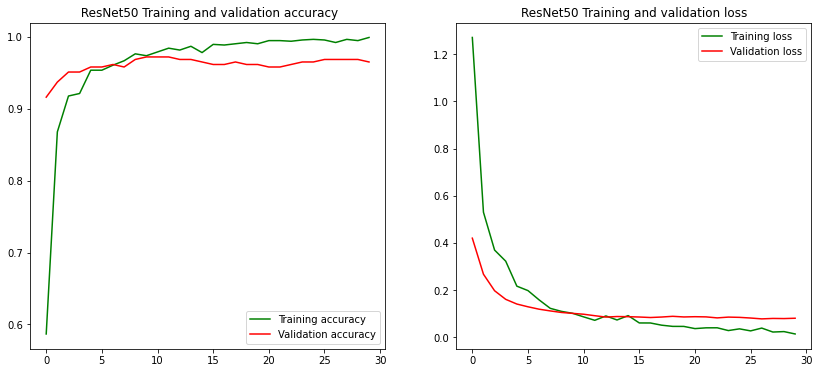

In [ ]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    # err = hist['mae']

    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    # val_err = hist['val_mae']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title(' ResNet50 Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('ResNet50 Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(train_model)

In [ ]:
 score = modelnew.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.0804663673043251
Validation accuracy: 0.9650349617004395


In [ ]:

predicted_classes = np.argmax(modelnew.predict(X_test),axis=1)


In [ ]:
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]

In [ ]:
target_names = ["Class {}:".format(i) for i in range(7)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

    Class 0:       0.95      1.00      0.97       135
    Class 1:       1.00      0.54      0.70        13
    Class 2:       1.00      1.00      1.00       100
    Class 3:       1.00      1.00      1.00         4
    Class 4:       1.00      1.00      1.00       102
    Class 5:       1.00      1.00      1.00         3
    Class 6:       0.00      0.00      0.00         1

    accuracy                           0.98       358
   macro avg       0.85      0.79      0.81       358
weighted avg       0.98      0.98      0.98       358



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_classes = np.argmax(modelnew.predict(X_test),axis=1)
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]
tr = enc.inverse_transform(np.unique(y).reshape(-1,1))
test = enc.inverse_transform(y_test.reshape(-1,1))
pred = enc.inverse_transform(predicted_classes.reshape(-1,1))
target_names = ["{}:".format(i[0]) for i in tr ]
# target_names
print(classification_report(test, pred, target_names=target_names))

              precision    recall  f1-score   support

      Adele:       0.95      1.00      0.97       135
  Gal_Gadot:       1.00      0.54      0.70        13
   Himanshu:       1.00      1.00      1.00       100
  Stephanie:       1.00      1.00      1.00         4
       Syed:       1.00      1.00      1.00       102
    Vandana:       1.00      1.00      1.00         3
 ben_afflek:       0.00      0.00      0.00         1

    accuracy                           0.98       358
   macro avg       0.85      0.79      0.81       358
weighted avg       0.98      0.98      0.98       358



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
modelnew.save('drive/My Drive/vg7.h5')

In [ ]:
# class_names = [0,1,2,3]

In [ ]:
# k = 1
# confidences = np.squeeze(modelnew.predict(X_test))
# inds = np.argsort(-confidences)
# top_k = inds[:k]
# top_confidences = confidences[inds]

# for i, (conf, ind) in enumerate(zip(top_confidences, top_k)):
#     print(f'Class #{i + 1} - {class_names[ind]} - Confidence: {100 * conf}%')

In [ ]:
modelRecog_json = modelnew.to_json()

In [ ]:
with open("drive/My Drive/Recog/modelRes24.json", "w") as json_file:
    json_file.write(modelRecog_json)
# serialize weights to HDF5
modelnew.save_weights("drive/My Drive/Recog/modelRes24.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
def addlayers(bottom_model, num_classes):
  
    top_model = bottom_model.output
 
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = tensorflow.keras.layers.Dropout(0.2)(top_model)

    top_model = BatchNormalization()(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
modelNAS = Sequential()
modelNAS = VGG16(include_top=False, pooling='max', input_shape = (224, 224, 3),weights='imagenet')

In [ ]:
num_classes = 7

FC_Head = addlayers(modelNAS, num_classes)
modelnewNAS = Model(inputs=modelNAS.input, outputs=FC_Head)

In [ ]:
modelnewNAS.compile(optimizer=tensorflow.keras.optimizers.Adam(
    learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelnewNAS.summary()

Model: "model_1260"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1252 (InputLayer)      [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0

In [ ]:
train_modelNAS = modelnewNAS.fit(X_train, y_train,
                  batch_size=16,
                  epochs=30,
                  validation_data=(X_val, y_val))

Epoch 1/30
72/72 [==============================] - 6s 71ms/step - loss: 1.3850 - accuracy: 0.5319 - val_loss: 0.3810 - val_accuracy: 0.9371
Epoch 2/30
72/72 [==============================] - 5s 68ms/step - loss: 0.3785 - accuracy: 0.9252 - val_loss: 0.4644 - val_accuracy: 0.9161
Epoch 3/30
72/72 [==============================] - 5s 68ms/step - loss: 0.3729 - accuracy: 0.9102 - val_loss: 0.2305 - val_accuracy: 0.9476
Epoch 4/30
72/72 [==============================] - 5s 68ms/step - loss: 0.2259 - accuracy: 0.9418 - val_loss: 0.1723 - val_accuracy: 0.9476
Epoch 5/30
72/72 [==============================] - 5s 68ms/step - loss: 0.2212 - accuracy: 0.9419 - val_loss: 0.1765 - val_accuracy: 0.9510
Epoch 6/30
72/72 [==============================] - 5s 68ms/step - loss: 0.1513 - accuracy: 0.9588 - val_loss: 0.1483 - val_accuracy: 0.9510
Epoch 7/30
72/72 [==============================] - 5s 68ms/step - loss: 0.1222 - accuracy: 0.9671 - val_loss: 0.2269 - val_accuracy: 0.9406
Epoch 8/30
72

In [ ]:
# modelnewNAS.predict(X_test)

array([[94.65838  , 22.745678 ,  0.       , ...,  0.       , 24.993444 ,
         0.       ],
       [17.527958 ,  0.       ,  3.238168 , ...,  9.846714 , 35.28937  ,
         5.848916 ],
       [43.628075 , 26.728054 ,  0.       , ...,  0.       , 29.29347  ,
         0.       ],
       ...,
       [17.098982 ,  7.2524495,  1.7740557, ...,  0.       , 32.756023 ,
         6.620986 ],
       [17.399504 ,  5.9291763, 17.66971  , ...,  0.       , 20.467485 ,
         5.6251144],
       [22.553633 ,  0.       ,  0.       , ...,  3.0557437, 33.069702 ,
         7.064757 ]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(modelnewNAS.predict(X_test),axis=1)
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]
tr = enc.inverse_transform(np.unique(y).reshape(-1,1))
test = enc.inverse_transform(y_test.reshape(-1,1))
pred = enc.inverse_transform(predicted_classes.reshape(-1,1))
target_names = ["{}:".format(i[0]) for i in tr ]
# target_names
print(classification_report(test, pred, target_names=target_names))

              precision    recall  f1-score   support

      Adele:       0.96      1.00      0.98       135
  Gal_Gadot:       1.00      0.62      0.76        13
   Himanshu:       1.00      1.00      1.00       100
  Stephanie:       1.00      1.00      1.00         4
       Syed:       1.00      1.00      1.00       102
    Vandana:       1.00      1.00      1.00         3
 ben_afflek:       0.00      0.00      0.00         1

    accuracy                           0.98       358
   macro avg       0.85      0.80      0.82       358
weighted avg       0.98      0.98      0.98       358



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


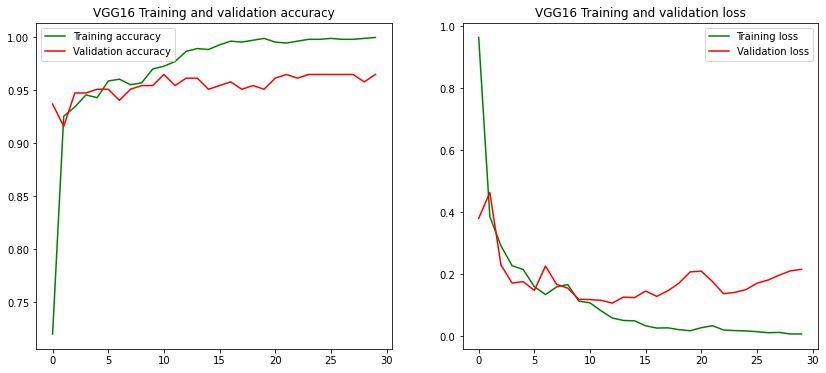

In [ ]:

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('VGG16 Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('VGG16 Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(train_modelNAS)

In [ ]:
 enc.inverse_transform(np.unique(y).reshape(-1,1))

array([['Adele'],
       ['Gal_Gadot'],
       ['Himanshu'],
       ['Stephanie'],
       ['Syed'],
       ['Vandana'],
       ['ben_afflek']], dtype=object)

In [ ]:
modelRecog_json = modelnewNAS.to_json()

In [ ]:
with open("drive/My Drive/Recog/modelVG1.json", "w") as json_file:
    json_file.write(modelRecog_json)
# serialize weights to HDF5
modelnew.save_weights("drive/My Drive/Recog/modelVG1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
modelnew.save('drive/My Drive/vg3.h5')